In [106]:
#PID controller implemented with python generator 
def PID(Kp, Ki, Kd, MV_bar=0):
    # Initialize stored data
    e_prev = 0
    nth_loop = -1
    I = 0
    
    # Initial control
    MV = MV_bar
    
    while True:
        # Yield MV for current movement, wait for new t, PV, SP
        # PV = rd[n]
        # SP = rd[n] + e[n]
        t, PV, SP = yield MV

        # PID calculations
        e = SP - PV
        
        P = Kp * e
        I = I + Ki*e*(t - nth_loop)
        D = Kd*(e - e_prev)/(t - nth_loop)
        
        MV = MV_bar + P + I + D
        print("Move {}, P {}, I {}, D {}".format(MV,P,I,D))
        # update stored data for next iteration
        e_prev = e
        nth_loop = t

In [290]:
# Due to lack of knowledge about the actual insertion situation, we assume that the Process module is a given 3-degree
# polynomial
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random

#Generate a random path and its counterpart with perturbation
def path(steps):
    a, b, c, d = random.rand(4)
    x = np.linspace(0,5,num = steps)
    y = a*x**3 + b*x**2 + c*x +d
    #We set the perturbation to a sine function
    perturbation = np.sin(x) * 10
    l1 = plt.plot(x,y,"b",label="Desired")
    l2 = plt.plot(x,y+perturbation,"r",label="Perturbed path")
    plt.legend()
    plt.show()
    return x,y+perturbation,y

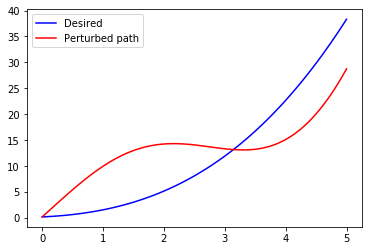

Move 0.0, P 0.0, I 0.0, D 0.0
Move -0.30290149319053467, P -0.10096716439684489, I -0.10096716439684489, D -0.10096716439684489
Move -0.42328962563430683, P -0.14109654187810228, I -0.24206370627494717, D -0.0401293774812574
Move -0.7526099792117984, P -0.21721427160498452, I -0.4592779778799317, D -0.07611772972688224
Move -0.9943908578839806, P -0.2507757172030112, I -0.7100536950829428, D -0.03356144559802665
Move -1.3617429613034118, P -0.30082166114116005, I -1.0108753562241029, D -0.05004594393814883
Move -1.6834907449867424, P -0.3244790166345999, I -1.3353543728587027, D -0.023657355493439836
Move -2.0780809429622087, P -0.35573519557936867, I -1.6910895684380713, D -0.03125617894476882
Move -2.4473254799713566, P -0.37065703570421793, I -2.0617466041422894, D -0.014921840124849251
Move -2.857018088176622, P -0.3886428399128501, I -2.4503894440551397, D -0.017985804208632186
Move -3.2506455938639247, P -0.3962996632405449, I -2.846689107295685, D -0.007656823327694795
Move -3.6

In [291]:
# Here we implement the control flow of the whole system
x_, actual_path, desired_path = path(100)
controller = PID(0.2,0.2,0.2)
controller.send(None)
original = actual_path.copy()
PID_revised_path = np.zeros(100)
for step in range(100):
    move = controller.send([step,actual_path[step],desired_path[step]])
    PID_revised_path[step] = actual_path[step]
    # The control output would affect the result of next step
    if not step == 99:
        actual_path[step+1] += move

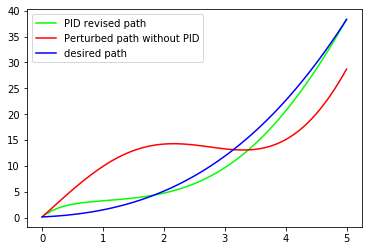

In [292]:
plt.plot(x_,PID_revised_path,"lime",label = "PID revised path")
plt.plot(x_,original,"r",label = "Perturbed path without PID")
plt.plot(x_,desired_path,"b",label="desired path")
plt.legend()
plt.show()

In [283]:
# Compare the mean square loss of scenarios with/without PID
deviation_with_PID = np.square(np.subtract(PID_revised_path,desired_path)).mean()
deviation_without_PID = np.square(np.subtract(original,desired_path)).mean()
(deviation_with_PID,deviation_without_PID)

(2.6194416996454164, 52.65038234058005)